# Petit retour sur les spectres

**Question** Créer les matrices d'ajacence correspondant aux graphes suivants: 
- un graphe complet de 100 noeuds
- un cercle de 100 noeuds
- un 100-barbell : graphe composé de deux cliques de 50 noeuds reliés par une arête

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def complet(n):
    return np.ones((n,n))-np.eye(n)

In [3]:
def cercle(n):
    G = np.eye(n)
    G = np.vstack((G[-1],G[:-1]))
    G = G + G.T
    return G

In [4]:
def barbel(n):
    G = np.zeros((n,n))
    G[:n//2,:n//2] = complet(n//2)
    G[n//2:,n//2:] = complet(n//2)
    G[0,n//2] = 1
    G[n//2,0] = 1
    return G

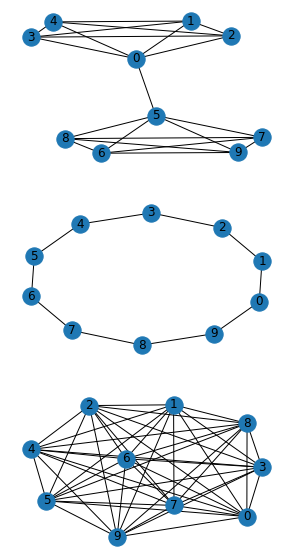

In [5]:
fig, axs = plt.subplots(3, figsize=(5,10))
funcs = [barbel, cercle, complet]
for i, m in enumerate(funcs):
    nx.draw(nx.Graph(m(10)), with_labels=True,ax=axs.ravel()[i])

**Question** Calculer pour chacun des graphes la matrice stochastique avec undamping factor de 0.99 

In [6]:
P2s = dict()
As = dict()
for m in funcs:
    n = m.__name__
    As[n] = m(100)
    P = As[n]/As[n].sum(axis=1)[:, np.newaxis]
    P2s[n] = .85 * P + .15/100

**Question** Calculer les vecteurs de Perron de ces graphes.

In [7]:
perron = dict()
for n, P in P2s.items():
    val, vect = np.linalg.eig(P.T)
    ind = np.argmax(np.abs(val))
    v = np.abs(vect[:,ind])
    perron[n] = v/v.sum()

In [8]:
perron

{'barbel': array([0.01016994, 0.00999653, 0.00999653, 0.00999653, 0.00999653,
        0.00999653, 0.00999653, 0.00999653, 0.00999653, 0.00999653,
        0.00999653, 0.00999653, 0.00999653, 0.00999653, 0.00999653,
        0.00999653, 0.00999653, 0.00999653, 0.00999653, 0.00999653,
        0.00999653, 0.00999653, 0.00999653, 0.00999653, 0.00999653,
        0.00999653, 0.00999653, 0.00999653, 0.00999653, 0.00999653,
        0.00999653, 0.00999653, 0.00999653, 0.00999653, 0.00999653,
        0.00999653, 0.00999653, 0.00999653, 0.00999653, 0.00999653,
        0.00999653, 0.00999653, 0.00999653, 0.00999653, 0.00999653,
        0.00999653, 0.00999653, 0.00999653, 0.00999653, 0.00999653,
        0.01016994, 0.00999653, 0.00999653, 0.00999653, 0.00999653,
        0.00999653, 0.00999653, 0.00999653, 0.00999653, 0.00999653,
        0.00999653, 0.00999653, 0.00999653, 0.00999653, 0.00999653,
        0.00999653, 0.00999653, 0.00999653, 0.00999653, 0.00999653,
        0.00999653, 0.00999653, 0.0099

**Question** Regadez en combien d'étapes l'itération donne ce résultat. 

In [9]:
for n, P in P2s.items():
    R = P
    i = 0 
    print(n)
    while not np.allclose(R[0], perron[n]):
        i += 1
        R = R@P
        #print(i, end=',')
    print(i)
    print(R)
    print('-'*50)

barbel
69
[[0.01017004 0.00999664 0.00999664 ... 0.00999643 0.00999643 0.00999643]
 [0.01017005 0.00999664 0.00999664 ... 0.00999642 0.00999642 0.00999642]
 [0.01017005 0.00999664 0.00999664 ... 0.00999642 0.00999642 0.00999642]
 ...
 [0.01016983 0.00999642 0.00999642 ... 0.00999664 0.00999664 0.00999664]
 [0.01016983 0.00999642 0.00999642 ... 0.00999664 0.00999664 0.00999664]
 [0.01016983 0.00999642 0.00999642 ... 0.00999664 0.00999664 0.00999664]]
--------------------------------------------------
cercle
82
[[0.00999999 0.01000011 0.00999999 ... 0.0100001  0.00999999 0.01000011]
 [0.01000011 0.00999999 0.01000011 ... 0.00999999 0.0100001  0.00999999]
 [0.00999999 0.01000011 0.00999999 ... 0.01000009 0.00999999 0.0100001 ]
 ...
 [0.0100001  0.00999999 0.01000009 ... 0.00999999 0.01000011 0.00999999]
 [0.00999999 0.0100001  0.00999999 ... 0.01000011 0.00999999 0.01000011]
 [0.01000011 0.00999999 0.0100001  ... 0.00999999 0.01000011 0.00999999]]
-----------------------------------------

**Question** Pour chaque type de graphe calculer la différence entre la plus grande et la seconde plus grande valeur propre. 

In [10]:
for n, P in P2s.items():
    val, vect = np.linalg.eig(P.T)
    ind = np.argsort(np.abs(val))
    l1, l2 = np.abs(val[ind[-1]]), np.abs(val[ind[-2]])
    print(n, l1, l2, l1-l2)

barbel 0.9999999999999978 0.8493325680704388 0.150667431929559
cercle 1.0000000000000009 0.8499999999999993 0.15000000000000158
complet 1.0000000000000024 0.008585858585858676 0.9914141414141437


**Question** Recommencez avec un damping factor plus grand (0.85)